In [1]:
from prepare import *
from acquire import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split_train_test


In [3]:
df = prep_titanic(get_titanic_data())
df.sample(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
738,738,0,3,male,NaN,0,0,7.8958,S,Third,Southampton,1,3
767,767,0,3,female,30.5,0,0,7.7500,Q,Third,Queenstown,1,2
811,811,0,3,male,39.0,0,0,24.1500,S,Third,Southampton,1,3
208,208,1,3,female,16.0,0,0,7.7500,Q,Third,Queenstown,1,2
840,840,0,3,male,20.0,0,0,7.9250,S,Third,Southampton,1,3


In [6]:
df = df.dropna()

In [7]:
train_df, test_df = train_test_split(df, test_size=.30, random_state=123, stratify=df[['survived']])

In [9]:
train_df.shape

(499, 13)

In [10]:
test_df.shape

(215, 13)

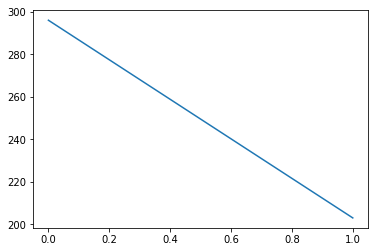

In [12]:
train_df.survived.value_counts().plot()

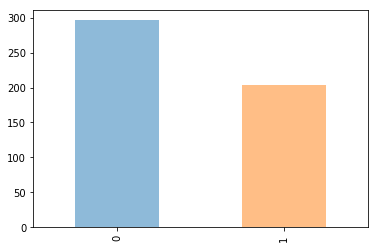

In [14]:
train_df.survived.value_counts().plot(kind='bar', alpha=.5)

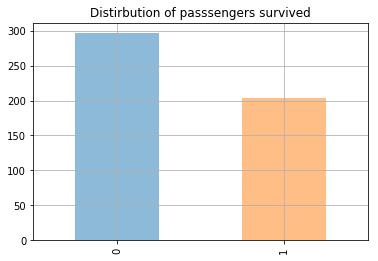

In [15]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

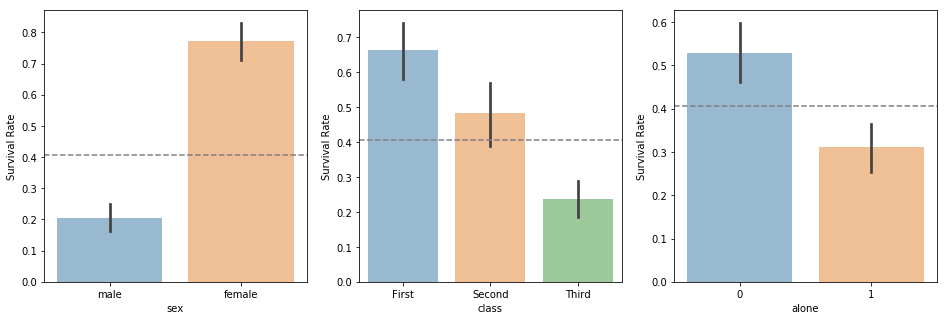

In [17]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

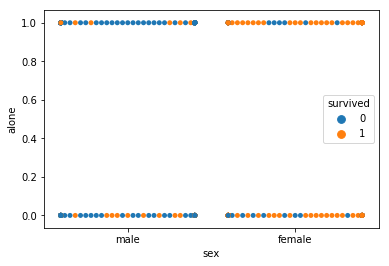

In [30]:
sns.swarmplot(x='sex', y='alone', data=train_df, hue='survived')

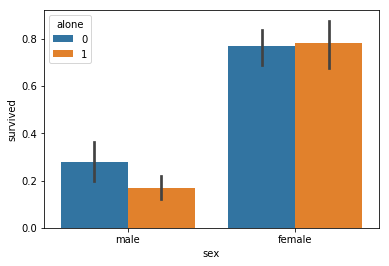

In [35]:
sns.barplot(x='sex', y='survived', data=train_df, hue='alone')

In [38]:
train_df.groupby(['sex', 'alone'])['survived'].count()

sex     alone
female  0        112
        1         65
male    0        107
        1        215
Name: survived, dtype: int64

In [40]:
df_family = train_df[train_df['alone']==0]

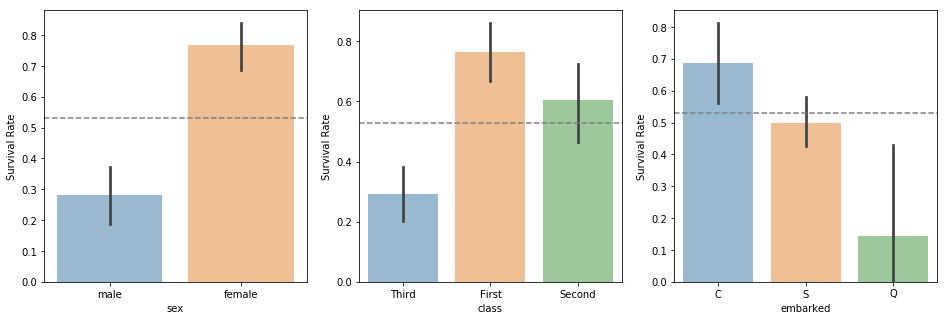

In [41]:
features = ['sex', 'class', 'embarked']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [56]:
pd.crosstab(df_family['class'], df_family.embarked, margins=True).style.background_gradient(cmap='terrain')

embarked,C,Q,S,All
class,,,,
First,24,2,46,72
Second,8,0,50,58
Third,16,5,68,89
All,48,7,164,219
